In [1]:
# Q-6: Consider the total number of collisions each year from 2013-2018. 
#   Is there an apparent trend? 
#   Fit a linear regression for the number of collisions per year and report its slope.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.simplefilter('ignore')
print(__doc__)
plt.style.use('fivethirtyeight')

Automatically created module for IPython interactive environment


In [3]:
def dataFram3NYC(FILE_NAME='NYPD_Motor_Vehicle_Collisions.csv',
                 use_parent_dir=False):
    """
    READS ~1,5 MILLION ROW CSV FILE, RETURNS MASTER DATAFRAME
    use_parent_dir will use parent directory as base directory
    """
    if use_parent_dir == True:
        CURRENTWRK_DIR = os.getcwd()
        BASE_DIR = os.path.dirname(CURRENTWRK_DIR)
    elif use_parent_dir == False:
        BASE_DIR = os.getcwd()


#     STATIC_FOLDER = os.path.dirname(BASE_DIR)
    STATIC_FOLDER = ''
    # FILE_NAME = 'NYPD_Motor_Vehicle_Collisions.csv'
    PATH_COMPILED = os.path.join(BASE_DIR, STATIC_FOLDER, FILE_NAME)
    print('\n> > > > dataFrameNYC() now reading csv with file path below')
    print(PATH_COMPILED)
    print()
    _df = pd.read_csv(PATH_COMPILED, encoding="iso-8859-1", low_memory=False)
    col_list = list(_df.columns)
    col_ind3x = np.arange(len(col_list))
    col_dict = dict(zip(col_ind3x, col_list))
    print(col_dict)
    return _df

In [4]:
def focusDataframer(columns2keep_list = [0,23]):
    """
    MODIFIED DATA FRAMER, PRINTS OUT ALL COLUMN INDEX/NAMES, 
    REQUIRES A LIST OF REQUESTED COLUMN INDEXES AS INTEGERS
    RETURNS A DATAFRAME WITH ONLY USER-SELECTED COLUMNS
    """
    pass
    raw_df = dataFram3NYC(use_parent_dir=True)
    col_list = list(raw_df.columns)
    col_ind3x = np.arange(len(col_list))
    col_dict = dict(zip( col_ind3x, col_list))
    col_final = []
    for index in columns2keep_list:
        add_this_column = col_dict[index]
        col_final.append(add_this_column)
    col_final = [
        str(index)
        for index in col_final
    ]
    _df = raw_df[
        col_final
    ]
    print()
    print('> > > focusDataframer(columns2keep_list = [indexNo_as_int00, indexNo_as_int01]')
    print('> > >                * selected columns:')
    for selected_col,keepthis in zip(columns2keep_list,col_final):
        print('> > >                                  ', selected_col,' keeps ', keepthis)
    return _df

In [5]:
focusDataframer(columns2keep_list = [0,23])


> > > > dataFrameNYC() now reading csv with file path below
C:\Users\DENVER\Desktop\interviewPY\INT_03_PYTHON_PANDAS_NYC_COLLISION\NYPD_Motor_Vehicle_Collisions.csv

{0: 'DATE', 1: 'TIME', 2: 'BOROUGH', 3: 'ZIP CODE', 4: 'LATITUDE', 5: 'LONGITUDE', 6: 'LOCATION', 7: 'ON STREET NAME', 8: 'CROSS STREET NAME', 9: 'OFF STREET NAME', 10: 'NUMBER OF PERSONS INJURED', 11: 'NUMBER OF PERSONS KILLED', 12: 'NUMBER OF PEDESTRIANS INJURED', 13: 'NUMBER OF PEDESTRIANS KILLED', 14: 'NUMBER OF CYCLIST INJURED', 15: 'NUMBER OF CYCLIST KILLED', 16: 'NUMBER OF MOTORIST INJURED', 17: 'NUMBER OF MOTORIST KILLED', 18: 'CONTRIBUTING FACTOR VEHICLE 1', 19: 'CONTRIBUTING FACTOR VEHICLE 2', 20: 'CONTRIBUTING FACTOR VEHICLE 3', 21: 'CONTRIBUTING FACTOR VEHICLE 4', 22: 'CONTRIBUTING FACTOR VEHICLE 5', 23: 'UNIQUE KEY', 24: 'VEHICLE TYPE CODE 1', 25: 'VEHICLE TYPE CODE 2', 26: 'VEHICLE TYPE CODE 3', 27: 'VEHICLE TYPE CODE 4', 28: 'VEHICLE TYPE CODE 5'}

> > > focusDataframer(columns2keep_list = [indexNo_as_int00

,DATE,UNIQUE KEY
0,04/30/2019,4123208
1,04/30/2019,4123128
2,04/30/2019,4124069
3,04/30/2019,4123202
4,04/30/2019,4123344
5,04/30/2019,4123160
6,04/30/2019,4123054
7,04/30/2019,4123755
8,04/30/2019,4123120
9,04/30/2019,4122965


In [6]:
def gr0upYearByCollusionCount(focus_df = focusDataframer()):
    """
    REQUIRES A DATAFRAME WITH A TARGET FIELD NAMED 'DATE',
    GROUP YEAR BY COLLUSION COUNT
    """
    pass
    print()
    print('> > > > gr0upYearByCollusionCount() calculated collusion count under year: ')
    focus_df['ye4r'] = [date[-4:] for date in focus_df['DATE']]
    gr0uped_df = focus_df.groupby('ye4r').count().drop(columns = 'DATE')
    gr0uped_df['c0llusionCount'] = [
        collusionCount
        for collusionCount in gr0uped_df['UNIQUE KEY']
    ]
    gr0uped_df = gr0uped_df.drop(columns='UNIQUE KEY')
    check_row_total = gr0uped_df.sum()[0]
    print('> > > > check if sum of all yearly collusion counts add up total row number {:,}'.format(check_row_total))
    print('> > > >                                                                     1,487,383 expected [?]')
    return gr0uped_df
# ----------------- 1487383
gr0upYearByCollusionCount()


> > > > dataFrameNYC() now reading csv with file path below
C:\Users\DENVER\Desktop\interviewPY\INT_03_PYTHON_PANDAS_NYC_COLLISION\NYPD_Motor_Vehicle_Collisions.csv

{0: 'DATE', 1: 'TIME', 2: 'BOROUGH', 3: 'ZIP CODE', 4: 'LATITUDE', 5: 'LONGITUDE', 6: 'LOCATION', 7: 'ON STREET NAME', 8: 'CROSS STREET NAME', 9: 'OFF STREET NAME', 10: 'NUMBER OF PERSONS INJURED', 11: 'NUMBER OF PERSONS KILLED', 12: 'NUMBER OF PEDESTRIANS INJURED', 13: 'NUMBER OF PEDESTRIANS KILLED', 14: 'NUMBER OF CYCLIST INJURED', 15: 'NUMBER OF CYCLIST KILLED', 16: 'NUMBER OF MOTORIST INJURED', 17: 'NUMBER OF MOTORIST KILLED', 18: 'CONTRIBUTING FACTOR VEHICLE 1', 19: 'CONTRIBUTING FACTOR VEHICLE 2', 20: 'CONTRIBUTING FACTOR VEHICLE 3', 21: 'CONTRIBUTING FACTOR VEHICLE 4', 22: 'CONTRIBUTING FACTOR VEHICLE 5', 23: 'UNIQUE KEY', 24: 'VEHICLE TYPE CODE 1', 25: 'VEHICLE TYPE CODE 2', 26: 'VEHICLE TYPE CODE 3', 27: 'VEHICLE TYPE CODE 4', 28: 'VEHICLE TYPE CODE 5'}

> > > focusDataframer(columns2keep_list = [indexNo_as_int00

,c0llusionCount
ye4r,
2012,100541
2013,203729
2014,206030
2015,217692
2016,229787
2017,230997
2018,231467
2019,67140


In [7]:
def yearLabeledCollusionCountDF(gr0uped_df=gr0upYearByCollusionCount(),
                                year_first=2013,
                                year_last=2018):
    """
    REQUIRES GROUPED DATAFRAME WITH YEAR ON INDEX AND COLLUSION COUNT AS VALUES
    """
    pass
    print()
    print(
        '> > > yearLabeledCollusionCountDF() returns a _df with below years on label: '
    )
    year_last += 1
    yrs_list = [
        int(year) for year in np.arange(int(year_first), int(year_last))
    ]
    print(yrs_list)
    yearLabel_df = gr0uped_df.T
    yearStr_list = [str(year) for year in yrs_list]
    return yearLabel_df[yearStr_list].T


> > > > gr0upYearByCollusionCount() calculated collusion count under year: 
> > > > check if sum of all yearly collusion counts add up total row number 1,487,383
> > > >                                                                     1,487,383 expected [?]


In [8]:
def snsRegressionPlot(df=yearLabeledCollusionCountDF().T,
                      yTarget='c0llusionCount',
                      gr0up_df=yearLabeledCollusionCountDF()):
    """df is a pivoted dataframe,
    yTarget is the value to be predicted
    ----default is 'United States'
    returns plot with regression
    """
    c0lorList = [
        'coral', 'goldenrod', 'salmon', 'orangered', 'darkolivegreen',
        'olivedrab', 'cadetblue', 'palevioletred', 'mediumorchid',
        'darkorange', 'teal', 'cyan', 'aqua'
    ]

    plt.rcParams["font.size"] = 12

    _colList_ = df.columns
    plt.figure(figsize=(12, 8))
    plt.title('Q6 - NO-OF-COLLUSIONS vs YEAR: TREND ANALYSIS')
    plt.xlabel('YEAR ')
    plt.ylabel('NUMBER OF COLLUSIONS')
    int_for_x_axis = [int(year) for year in gr0up_df.index]
    x_axis = pd.Series(int_for_x_axis)
    y_axis = pd.Series(gr0up_df[yTarget])
    rand1nt = np.random.randint(0, len(c0lorList))
    c0lor = c0lorList[rand1nt]
    sns.regplot(
        y=y_axis, x=x_axis, data=df, fit_reg=True, color=c0lor, marker='o')
    plt.grid(True)
    plt.show()
    return None


> > > yearLabeledCollusionCountDF() returns a _df with below years on label: 
[2013, 2014, 2015, 2016, 2017, 2018]

> > > yearLabeledCollusionCountDF() returns a _df with below years on label: 
[2013, 2014, 2015, 2016, 2017, 2018]


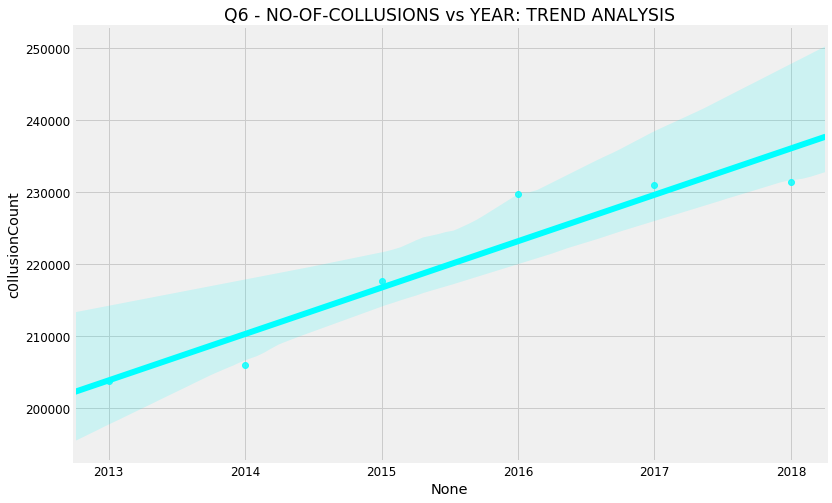

In [9]:
snsRegressionPlot()
# hit ctrl+enter for jedi lightsaber experience lol

In [10]:
# Q-6: Consider the total number of collisions each year from 2013-2018. 
# * Is there an apparent trend? 
# * Fit a linear regression for the number of collisions per year and report its slope.

In [11]:
df = yearLabeledCollusionCountDF().T
yTarget = 'c0llusionCount'
gr0up_df = yearLabeledCollusionCountDF()
# ------------------------------------
int_for_x_axis = [int(year)for year in gr0up_df.index]
x_axis = pd.Series(int_for_x_axis)
y_axis = pd.Series(gr0up_df[yTarget])


> > > yearLabeledCollusionCountDF() returns a _df with below years on label: 
[2013, 2014, 2015, 2016, 2017, 2018]

> > > yearLabeledCollusionCountDF() returns a _df with below years on label: 
[2013, 2014, 2015, 2016, 2017, 2018]


In [22]:
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)
# Train the model using the training sets
year_first = x_axis[0] 
year_last = x_axis[5]
year_last += 1
x_ax1s = np.arange(int(year_first), int(year_last))
x_ax2s = x_ax1s.reshape(-1, 1)

In [23]:
regr.fit(x_ax2s, y_axis)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_predict = regr.predict(x_ax2s)

In [25]:
r2_score

<function sklearn.metrics.regression.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')>

Coefficients: 
 [6448.17142857]
Intercept: 
 -12776339.18095238
Mean squared error: 14299810.47
R-2-Variance score: 0.89


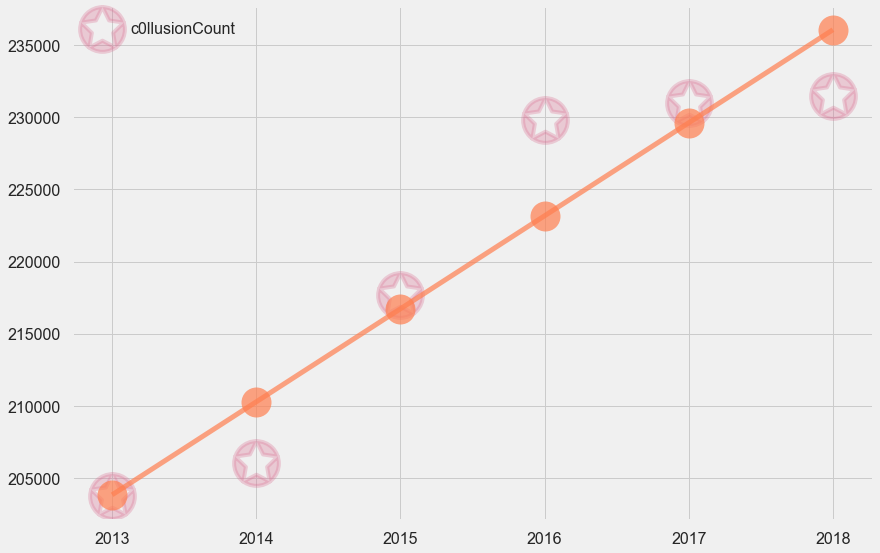

In [106]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_axis, y_predict))
# Explained variance score: 1 is perfect prediction
print('R-2-Variance score: %.2f' % r2_score(y_axis, y_predict))

c0lorList = [
    'coral',
    'palevioletred',
    'mediumorchid',
    'darkorange',
    'teal',
    'coral',
    'goldenrod',
    'salmon',
    'orangered',
]
rand1nt = np.random.randint(0, len(c0lorList))
c0lor = c0lorList[rand1nt]
rand2nt = np.random.randint(0, len(c0lorList))
c0lor2 = c0lorList[rand2nt]
plt.scatter(
    x_ax2s,
    y_axis,
    s=2000,
    color=c0lor,
    edgecolors=c0lor,
    marker=cut_st4r(5),
    linewidth=4,
    alpha=0.3)
plt.plot(
    x_ax2s, y_predict, color=c0dcssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss
    lor2, marker='o', markersize=30, linewidth=5, alpha = 0.7)
plt.legend(loc='best')
plt.show()

In [53]:
# plt.style.use('fivethirtyeight')
import matplotlib.path as mpath
# this is a code of a negative-spaced-star-shaped SVG path that will
# mark rounds help player  see important date points easily
def cut_st4r(n):
    star = mpath.Path.unit_regular_star(n)
    circle = mpath.Path.unit_circle()
    # concatenate the circle with an internal cutout of the star
    verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
    codes = np.concatenate([circle.codes, star.codes])
    cut_star = mpath.Path(verts, codes)
    return cut_star

<Figure size 864x576 with 0 Axes>

Text(0.5,1,'Q6 - NO-OF-COLLUSIONS vs YEAR: TREND ANALYSIS')

Text(0.5,0,'YEAR ')

Text(0,0.5,'NUMBER OF COLLUSIONS')

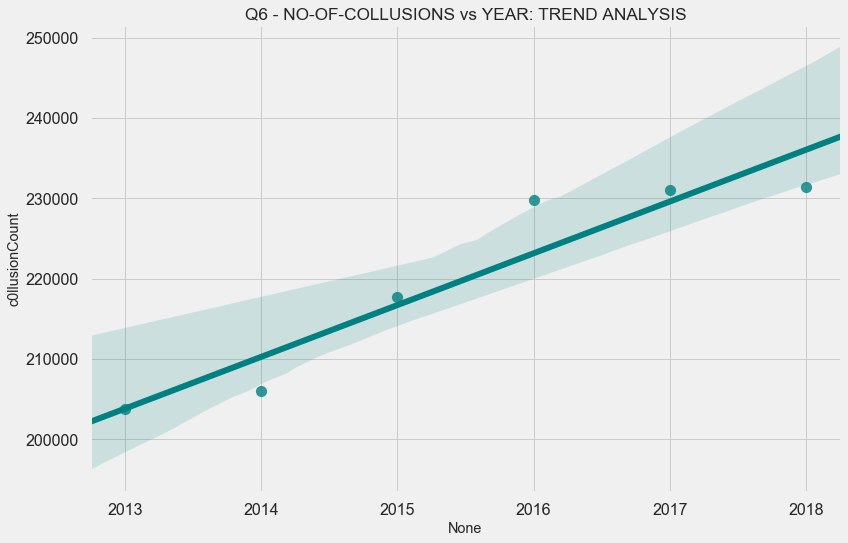

In [55]:
c0lorList=['coral', 'goldenrod', 'salmon', 'orangered', 'darkolivegreen', 'olivedrab',
           'cadetblue', 'palevioletred', 'mediumorchid', 'darkorange', 'teal', 'cyan', 'aqua']
plt.rcParams["font.size"] = 12
_colList_ = df.columns
plt.figure(figsize = (12,8))        
plt.title('Q6 - NO-OF-COLLUSIONS vs YEAR: TREND ANALYSIS')
plt.xlabel('YEAR ')
plt.ylabel('NUMBER OF COLLUSIONS')
rand1nt = np.random.randint(0,len(c0lorList))
c0lor = c0lorList[rand1nt] 
sns.regplot(y=y_axis, x=x_axis, data=df, fit_reg = True, color= c0lor, marker='o')
plt.grid(True)
plt.show()